In [1]:
# Import một số thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pylab as pl
%matplotlib inline

In [3]:
# Đọc dữ liệu
drug = pd.read_csv('../data/drug200.csv')
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# basic statistics details
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


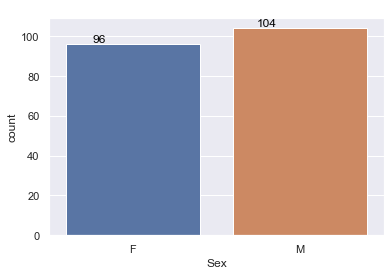

In [7]:
sn.set_theme(style="darkgrid")

# For Sex Column
ax = sn.countplot(x="Sex", data=drug)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

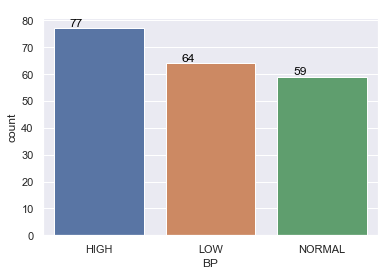

In [8]:
# For BP Column
ax = sn.countplot(x="BP", data=drug)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

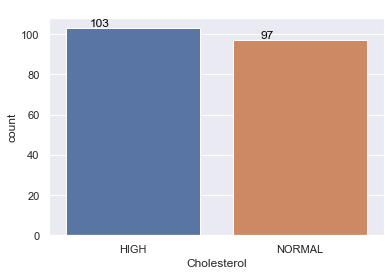

In [9]:
#For Cholestrol Column
ax = sn.countplot(x="Cholesterol", data=drug)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

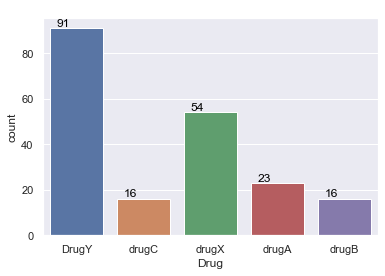

In [10]:
#For drug Column
ax = sn.countplot(x="Drug", data=drug)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

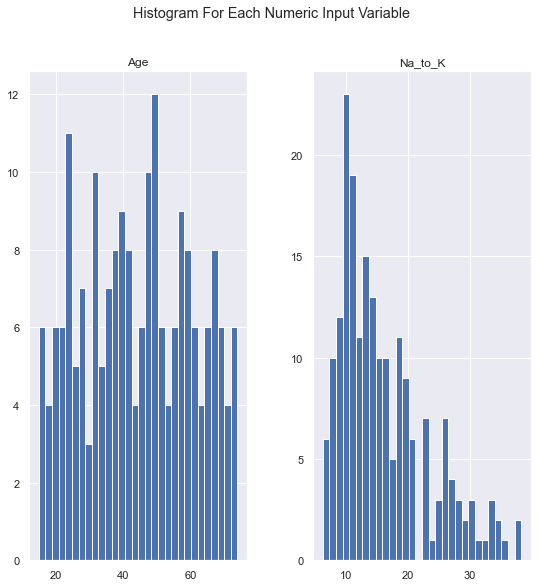

In [11]:
# Plotting histogram for numeric variables
drug[['Age','Na_to_K']].hist(bins=30, figsize=(9,9),)
pl.suptitle("Histogram For Each Numeric Input Variable")
plt.show()

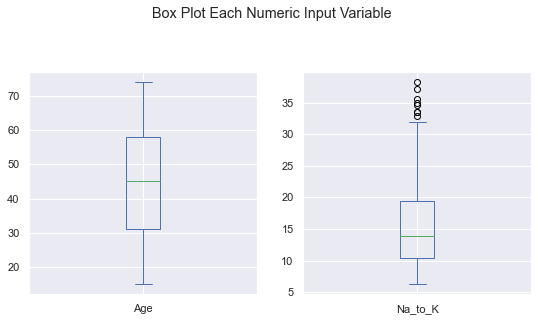

In [12]:
#Plotting boxplot for numeric variables
drug[['Age','Na_to_K']].plot(kind='box', subplots=True, layout=(2,2),figsize=(9,9),title='Box Plot Each Numeric Input Variable')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(x):
    le = LabelEncoder()
    drug[x] = le.fit_transform(drug[x])

In [14]:
categ = ["Sex","BP","Cholesterol","Drug"]

for l in categ:
    label_encoder(l)

In [15]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [20]:
X = drug.drop('Drug', axis = 1)
y = drug['Drug']

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.13559322, 0.        , 0.        , 0.        , 0.59684783],
       [0.54237288, 1.        , 0.5       , 0.        , 0.21339671],
       [0.54237288, 1.        , 0.5       , 0.        , 0.12023891],
       [0.22033898, 0.        , 1.        , 0.        , 0.04781412],
       [0.77966102, 0.        , 0.5       , 0.        , 0.36819063],
       [0.11864407, 0.        , 1.        , 0.        , 0.07311277],
       [0.57627119, 0.        , 1.        , 0.        , 0.31290262],
       [0.44067797, 1.        , 0.5       , 0.        , 0.14910251],
       [0.76271186, 1.        , 1.        , 0.        , 0.27837889],
       [0.47457627, 1.        , 0.5       , 1.        , 0.40962537],
       [0.54237288, 0.        , 0.5       , 0.        , 0.1719307 ],
       [0.3220339 , 0.        , 0.        , 1.        , 0.40434048],
       [0.47457627, 1.        , 0.5       , 0.        , 0.28478954],
       [1.        , 0.        , 0.5       , 0.        , 0.45884671],
       [0.59322034, 0.        , 1.

In [24]:
import pickle

with open('drug/X.pkl', 'wb') as f:
    pickle.dump(X, f)

with open('drug/y.pkl', 'wb') as f:
    pickle.dump(y, f)